In [21]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

FILE_TEST = 'formatted_csv_dataset/formatted_test.tweet.csv'
FILE_TRAIN = 'formatted_csv_dataset/formatted_training.csv'

tweets_df_base = pd.read_csv(FILE_TRAIN, sep=',')

# Swap latitude and longitude column values; we made a mistake when formatting the dataset to a csv file
tweets_df_base.rename(columns={'coordinates_lat' : 'coordinates_lat_old'}, inplace=True)
tweets_df_base.rename(columns={'coordinates_long' : 'coordinates_lat'}, inplace=True)
tweets_df_base.rename(columns={'coordinates_lat_old' : 'coordinates_long'}, inplace=True)

test_tweets_df_base = pd.read_csv(FILE_TEST, sep=',')

Plotting training and test sets scatter plots


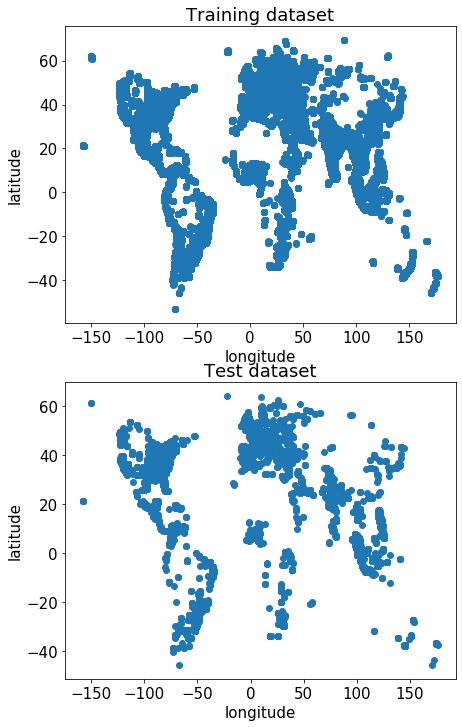

In [94]:
from matplotlib import rc

rc('font', size=15)

print('Plotting training and test sets scatter plots')

fig = plt.figure(figsize=(7, 12))

fig = plt.subplot(211)
plt.scatter(tweets_df_base['coordinates_long'], tweets_df_base['coordinates_lat'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Training dataset')

fig = plt.subplot(212)
plt.scatter(test_tweets_df_base['coordinates_long'], test_tweets_df_base['coordinates_lat'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Test dataset')

plt.show()

In [31]:
tweets_df_base.head(1)

,created_at,id,lang,retweeted,retweet_count,place,text,user_id_str,user_name,user_screen_name,...,user_description,user_followers_count,user_friends_count,user_created_at,user_geo_enabled,user_verified,user_lang,coordinates_long,coordinates_lat,tweet_city
0,Thu Sep 05 19:02:04 +0000 2013,375695343696236544,es,False,0,NaN,@hcorbacho Exactamente!!!,172417422,Daphne Corral 💪 #24A,barzadafne,...,"Necesitas traducir textos, videos, folletos, a...",3900,3272,Thu Jul 29 17:25:38 +0000 2010,True,False,NaN,-58.63203,-34.48449,moron-01-ar


In [78]:
from collections import Counter

user_counts_train = list()
for val, df in tweets_df_base.groupby('user_screen_name'):
    user_counts_train.append(df.shape[0])

user_counter_train = Counter(user_counts_train)

KeyboardInterrupt: 

Text(0, 0.5, 'number of users')

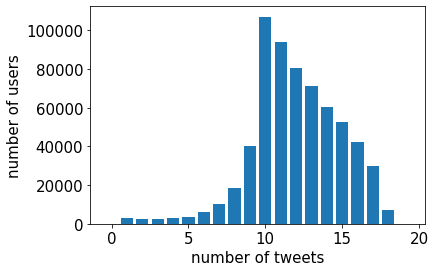

In [80]:
plt.bar([i for i in range(20)], [user_counter_train[i] for i in range(20)])
plt.xlabel('number of tweets')
plt.ylabel('number of users')

In [62]:
from nltk.tokenize import word_tokenize

tweets_df_base['num_tokens'] = tweets_df_base['text'].apply(lambda t: len(word_tokenize(t.strip())) if type(t) == str else 0)
tweets_df_base['num_chars'] = tweets_df_base['text'].apply(lambda t: len(t.strip()) if type(t) == str else 0)

tweets_df_base.head(1)

,created_at,id,lang,retweeted,retweet_count,place,text,user_id_str,user_name,user_screen_name,...,user_friends_count,user_created_at,user_geo_enabled,user_verified,user_lang,coordinates_long,coordinates_lat,tweet_city,num_tokens,num_chars
0,Thu Sep 05 19:02:04 +0000 2013,375695343696236544,es,False,0,NaN,@hcorbacho Exactamente!!!,172417422,Daphne Corral 💪 #24A,barzadafne,...,3272,Thu Jul 29 17:25:38 +0000 2010,True,False,NaN,-58.63203,-34.48449,moron-01-ar,6,25


Text(0.5, 1.0, 'Distribution of number of characters across tweets')

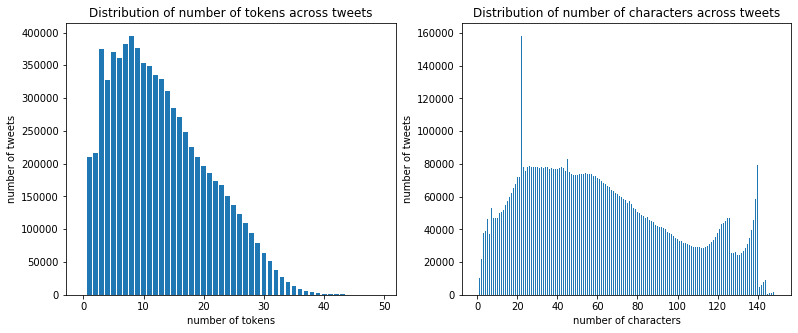

In [68]:
tokens_count = list()
for val, df in tweets_df_base.groupby('num_tokens'):
    tokens_count.append((val, df.shape[0]))
    
chars_count = list()
for val, df in tweets_df_base.groupby('num_chars'):
    chars_count.append((val, df.shape[0]))

Text(0.5, 1.0, 'Distribution of number of characters across tweets')

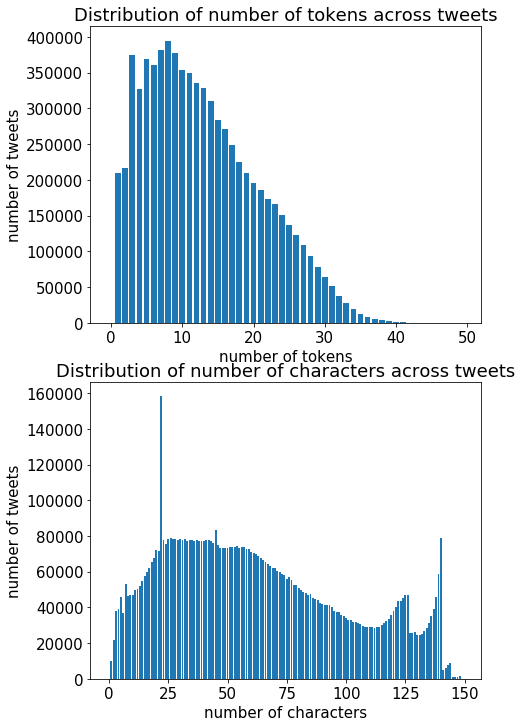

In [91]:
fig = plt.figure(figsize=(7, 12))

fig = plt.subplot(211)
plt.bar([num_tokens for (num_tokens, count) in tokens_count[:50]], [count for (num_tokens, count) in tokens_count[:50]])
plt.xlabel('number of tokens')
plt.ylabel('number of tweets')
plt.title('Distribution of number of tokens across tweets')


fig = plt.subplot(212)
plt.bar([num_chars for (num_chars, count) in chars_count[:150]], [count for (num_chars, count) in chars_count[:150]])
plt.xlabel('number of characters')
plt.ylabel('number of tweets')
# plt.xticks(rotation=90)
plt.title('Distribution of number of characters across tweets')

In [72]:
print('user_geo_enabled')
for val, df in tweets_df_base.groupby('user_geo_enabled'):
    print((val, df.shape[0] / tweets_df_base.shape[0] * 100))
    
print('\nuser_verified')
for val, df in tweets_df_base.groupby('user_verified'):
    print((val, df.shape[0] / tweets_df_base.shape[0] * 100))

user_geo_enabled
(False, 2.970493671186557)
(True, 97.02950632881344)

user_verified
(False, 99.50340112729104)
(True, 0.4965988727089537)


In [47]:
print('num_users: ', tweets_df_base['user_screen_name'].unique().shape[0])

num_users:  632474


In [56]:
city_count = list()
for val, df in tweets_df_base.groupby('tweet_city'):
    city_count.append((val, df.shape[0]))

city_count = sorted(city_count, key=lambda c: c[1], reverse=True)
city_cdf = pd.Series([count for (city, count) in city_count]).cumsum()

print(len(city_count), ' cities')

3262  cities


Text(0.5, 1.0, 'Cumulative sum of tweets across cities')

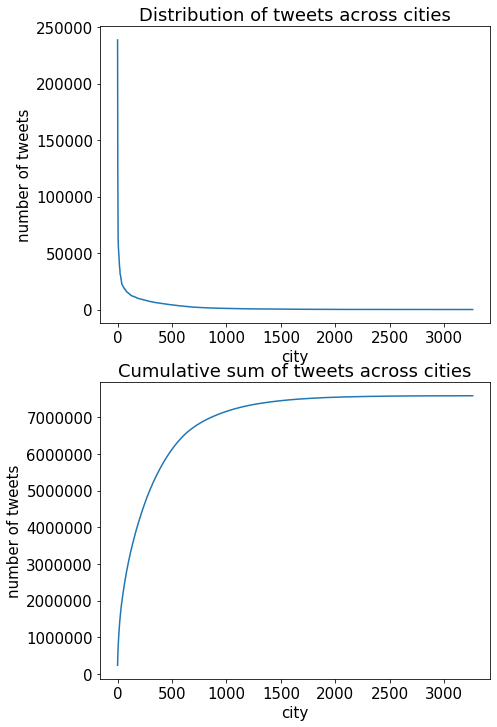

In [90]:
fig = plt.figure(figsize=(7, 12))

fig = plt.subplot(211)
plt.plot([i for i in range(len(city_count))], [count for (city, count) in city_count])
plt.xlabel('city')
plt.ylabel('number of tweets')
# plt.xticks(rotation=90)
plt.title('Distribution of tweets across cities')

fig = plt.subplot(212)
plt.plot([i for i in range(len(city_count))], city_cdf)
plt.xlabel('city')
plt.ylabel('number of tweets')
# plt.xticks(rotation=90)
plt.title('Cumulative sum of tweets across cities')

In [75]:
# Least frequent cities
print('Cities with 1 tweet: ', len([city for (city, count) in city_count if count == 1]))


# Most frequent cities 
top_1k = sum([count for (city, count) in city_count[:1000]])
top_100 = sum([count for (city, count) in city_count[:100]])
total = sum([count for (city, count) in city_count]) 

top_1k / total , top_100 / total

Cities with 1 tweet:  110


(0.9438544966357985, 0.40115287533068344)

In [42]:
lang_count = list()
for val, df in tweets_df_base.groupby('lang'):
    lang_count.append((val, df.shape[0]))

print(len(lang_count), ' languages')

sorted(lang_count, key=lambda l: l[1], reverse=True)

39  languages


[('en', 6077189),
 ('und', 472248),
 ('in', 384934),
 ('pt', 131473),
 ('es', 130879),
 ('tl', 104066),
 ('fr', 44726),
 ('tr', 40557),
 ('et', 28430),
 ('ht', 24685),
 ('nl', 19903),
 ('it', 19861),
 ('ca', 13314),
 ('de', 10345),
 ('pl', 9366),
 ('da', 7613),
 ('lv', 7281),
 ('hi', 7120),
 ('sv', 6846),
 ('eu', 6728),
 ('cy', 6557),
 ('no', 5670),
 ('ro', 5003),
 ('lt', 3981),
 ('cs', 3686),
 ('hu', 2909),
 ('fi', 2769),
 ('is', 1840),
 ('vi', 1174),
 ('sl', 1138),
 ('iw', 145),
 ('ru', 125),
 ('ja', 79),
 ('ar', 47),
 ('th', 41),
 ('ko', 33),
 ('zh', 15),
 ('el', 3),
 ('ka', 1)]